<a href="https://colab.research.google.com/github/seabnavin19/Cambodia-Football-Match-result-prediction/blob/main/back_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastquant

     |████████████████████████████████| 5.3 MB 8.8 MB/s 
     |████████████████████████████████| 138 kB 64.4 MB/s 
     |████████████████████████████████| 97 kB 7.3 MB/s 
     |████████████████████████████████| 148 kB 61.8 MB/s 
     |████████████████████████████████| 410 kB 57.3 MB/s 
     |████████████████████████████████| 510 kB 43.4 MB/s 
     |████████████████████████████████| 191 kB 51.1 MB/s 
     |████████████████████████████████| 6.3 MB 41.5 MB/s 
     |████████████████████████████████| 2.0 MB 29.7 MB/s 
     |████████████████████████████████| 1.5 MB 57.1 MB/s 
     |████████████████████████████████| 743 kB 57.3 MB/s 
     |████████████████████████████████| 745 kB 69.9 MB/s 
     |████████████████████████████████| 294 kB 65.7 MB/s 
     |████████████████████████████████| 1.3 MB 35.3 MB/s 
     |████████████████████████████████| 3.0 MB 71.0 MB/s 
     |████████████████████████████████| 142 kB 59.7 MB/s 
     |████████████████████████████████| 291 kB 38.7 MB/s 
     |███████████

In [ ]:
from fastquant import get_stock_data
jfc = get_stock_data("JFC", "2018-01-01", "2019-01-01")


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JFC: Data doesn't exist for startDate = 1514764800, endDate = 1546300800


## use SMA

Starting Portfolio Value: 100000.00
2020-05-31T00:00:00, ===Global level arguments===
2020-05-31T00:00:00, init_cash : 100000
2020-05-31T00:00:00, buy_prop : 1
2020-05-31T00:00:00, sell_prop : 1
2020-05-31T00:00:00, commission : 0
2020-05-31T00:00:00, stop_loss : 0
2020-05-31T00:00:00, stop_trail : 0
2020-05-31T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2020-05-31T00:00:00, Final Portfolio Value: 183830.97
2020-05-31T00:00:00, Final PnL: 83830.97
Time used (seconds): 0.34143757820129395
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['rsi']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	rsi_period:14	rsi_upper:

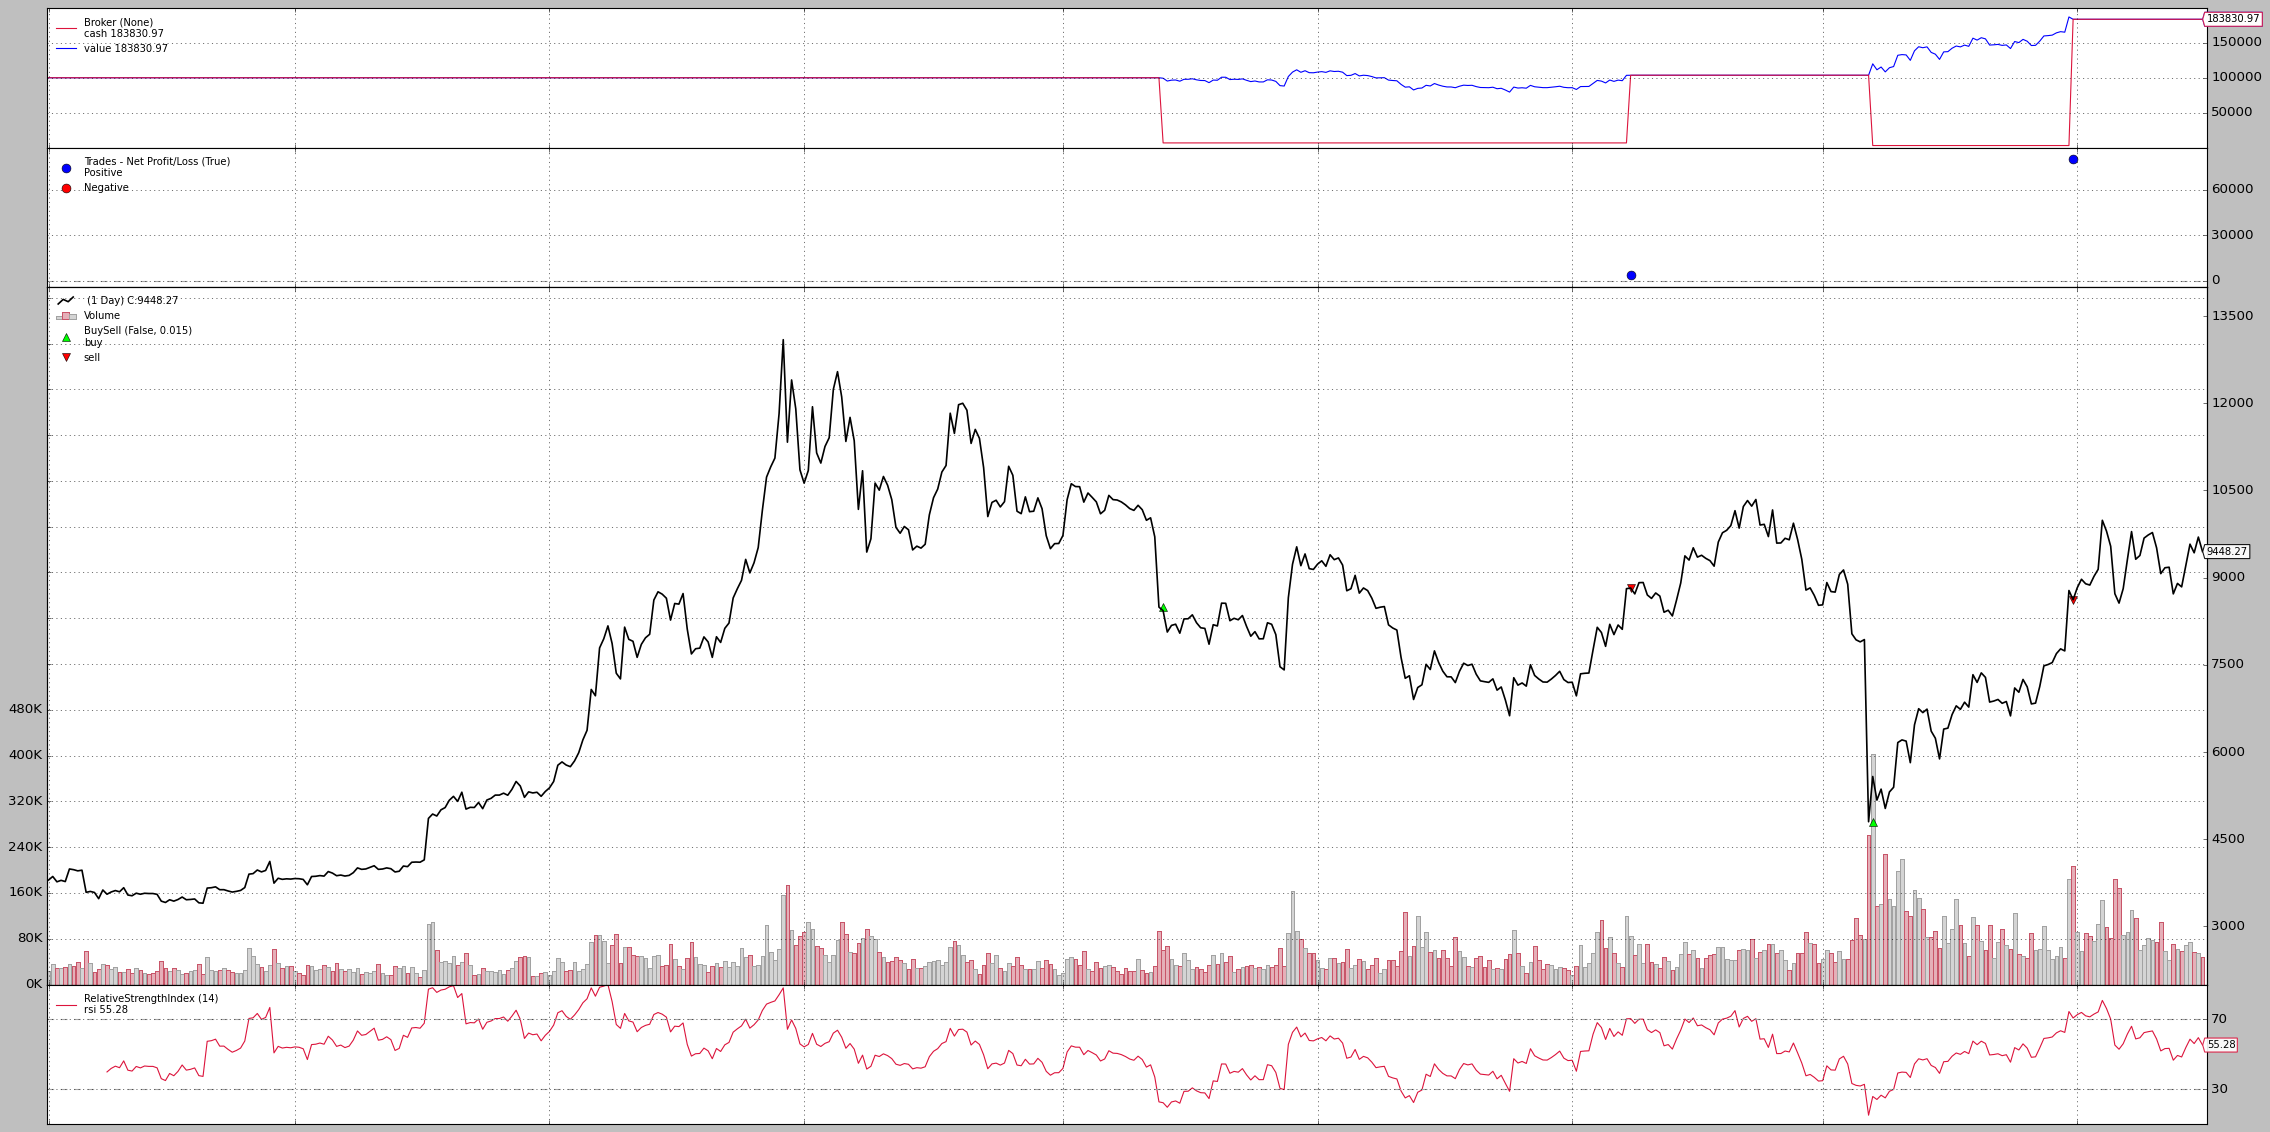

NameError: ignored

In [3]:
from fastquant import backtest, get_stock_data,get_crypto_data
# df = get_stock_data("MSFT", "2018-01-01", "2019-01-01")
df = get_crypto_data("BTC/USDT", "2019-01-01", "2020-05-31")
backtest('rsi', df, rsi_period=14, rsi_upper=70, rsi_lower=30)
# plot.show()

In [8]:
# !pip install PyAlgoTrade
# !pip install backtrader
# !pip install yfinance
# res

### simple moving average strategies

In [ ]:
class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


### simple custome strategies

In [7]:
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        print('Close, %.2f' % self.dataclose[0])

        if self.dataclose[0] < self.dataclose[-1]:
            # current close less than previous close

            if self.dataclose[-1] < self.dataclose[-2]:
                # previous close less than the previous close

                # BUY, BUY, BUY!!! (with all possible default parameters)
                print('BUY CREATE, %.2f' % self.dataclose[0])
                self.buy()

### run strategies

In [5]:
from datetime import datetime
import backtrader as bt
import yfinance as yf

# Create a subclass of Strategy to define the indicators and logic





cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.PandasData(dataname=yf.download('SPY', '2021-01-01', '2021-07-01', auto_adjust=True))

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(TestStrategy)  # Add the trading strategy

[*********************100%***********************]  1 of 1 completed


0

Close, 366.39
Close, 368.91
Close, 371.12
Close, 376.63
Close, 378.78
Close, 376.22
Close, 376.30
Close, 377.32
Close, 375.99
Close, 373.25
BUY CREATE, 373.25
Close, 376.18
Close, 381.39
Close, 381.74
Close, 380.39
Close, 381.89
Close, 381.29
Close, 371.97
BUY CREATE, 371.97
Close, 375.17
Close, 367.66
Close, 373.78
Close, 379.06
Close, 379.36
Close, 383.67
Close, 385.18
Close, 387.97
Close, 387.71
Close, 387.54
BUY CREATE, 387.54
Close, 388.16
Close, 390.08
Close, 389.74
Close, 389.83
Close, 388.17
Close, 387.49
BUY CREATE, 387.49
Close, 384.51
BUY CREATE, 384.51
Close, 384.98
Close, 389.22
Close, 379.84
Close, 377.88
BUY CREATE, 377.88
Close, 387.04
Close, 384.02
Close, 378.94
BUY CREATE, 378.94
Close, 374.25
BUY CREATE, 374.25
Close, 381.13
Close, 379.23
Close, 384.65
Close, 387.04
Close, 390.97
Close, 391.49
Close, 393.83
Close, 393.33
Close, 394.67
Close, 388.93
Close, 388.21
BUY CREATE, 388.21
Close, 391.31
Close, 388.23
Close, 386.26
BUY CREATE, 386.26
Close, 388.43
Close, 394.6

<Figure size 8000x6400 with 0 Axes>

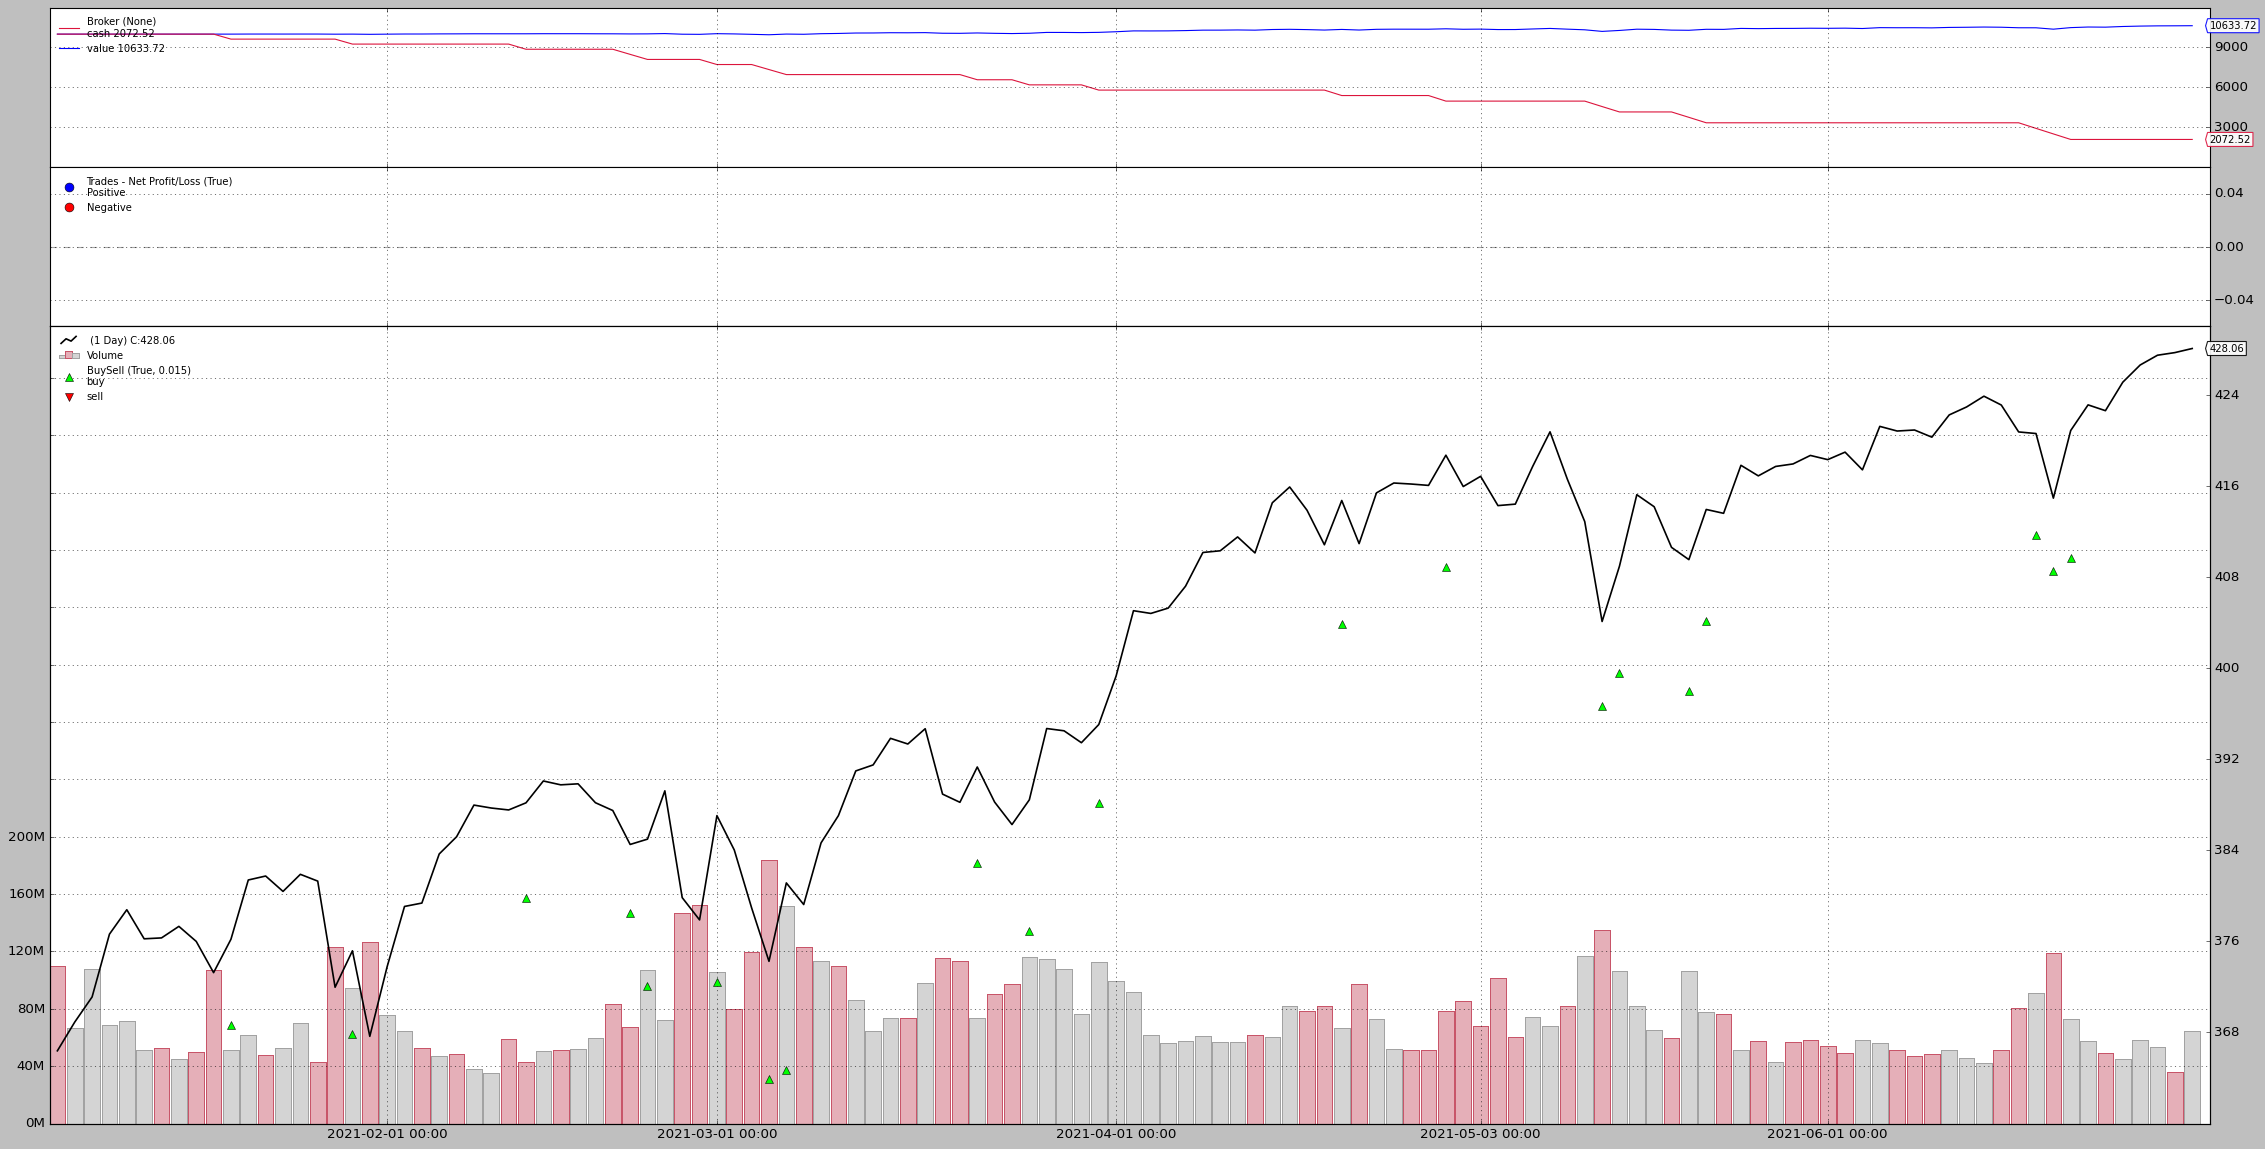

[[<Figure size 2400x1200 with 4 Axes>]]

In [6]:
import matplotlib.pyplot as plt
# cerebro.add_signal(bt.SIGNAL_LONGSHORT, MySignal)
plt.figure(figsize=((100,80)))
cerebro.run() 
cerebro.plot(height= 30, iplot= False)

In [ ]:
def load_data(ticker,START,TODAY):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
from datetime import date
import yfinance as yf
START = "2018-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
df=load_data("GOOG",START,TODAY)
# df.to_csv("me.csv")]
df.shape

[*********************100%***********************]  1 of 1 completed


(931, 7)

In [ ]:
# !pip install yfinance]
# df.shape
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582
...,...,...,...,...,...,...,...
1681,2021-09-07,2894.989990,2916.479980,2890.820068,2910.379883,2910.379883,758500
1682,2021-09-08,2907.870117,2911.020020,2884.000000,2897.669922,2897.669922,774300
1683,2021-09-09,2897.669922,2913.389893,2888.679932,2898.270020,2898.270020,739900
1684,2021-09-10,2908.870117,2920.379883,2834.830078,2838.419922,2838.419922,1643500


In [ ]:
df1=df[["Date","Close"]]

In [ ]:
df1.head()

,Date,Close
0,2015-01-02,523.373108
1,2015-01-05,512.463013
2,2015-01-06,500.585632
3,2015-01-07,499.727997
4,2015-01-08,501.303680


In [ ]:
import pandas as pd
df1["dt"]=pd.to_datetime(df1["Date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.drop("Date",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1.to_csv("me.csv")

## use custom strategies

Text(0.5, 1.0, 'BTC/USDT: Forecasted Daily Closing Price')

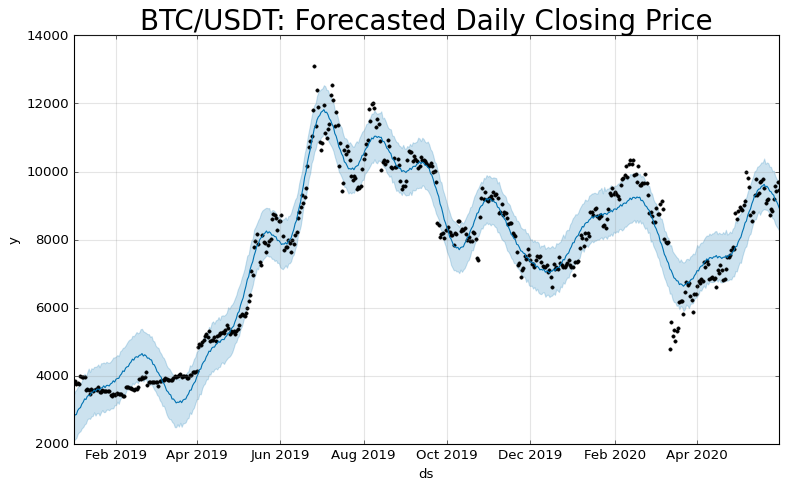

In [ ]:
from fastquant import get_crypto_data, backtest
from fbprophet import Prophet
from matplotlib import pyplot as plt

# Pull crypto data
df = get_crypto_data("BTC/USDT", "2019-01-01", "2020-05-31")

# Fit model on closing prices
ts = df.reset_index()[["dt", "close"]]
ts.columns = ['ds', 'y']
m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(ts)
forecast = m.make_future_dataframe(periods=0, freq='D')

# Predict and plot
pred = m.predict(forecast)
fig1 = m.plot(pred)
plt.title('BTC/USDT: Forecasted Daily Closing Price', fontsize=25)

Starting Portfolio Value: 100000.00
2020-05-30T00:00:00, ===Global level arguments===
2020-05-30T00:00:00, init_cash : 100000
2020-05-30T00:00:00, buy_prop : 1
2020-05-30T00:00:00, sell_prop : 1
2020-05-30T00:00:00, commission : 0
2020-05-30T00:00:00, stop_loss : 0
2020-05-30T00:00:00, stop_trail : 0
2020-05-30T00:00:00, take_profit : 0
===Strategy level arguments===
Upper limit:  1.5
Lower limit:  -1.5
2020-05-30T00:00:00, Final Portfolio Value: 424380.15
2020-05-30T00:00:00, Final PnL: 324380.15
Time used (seconds): 0.31440019607543945
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['custom']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	upper_limit:1.5	lower_limit:-

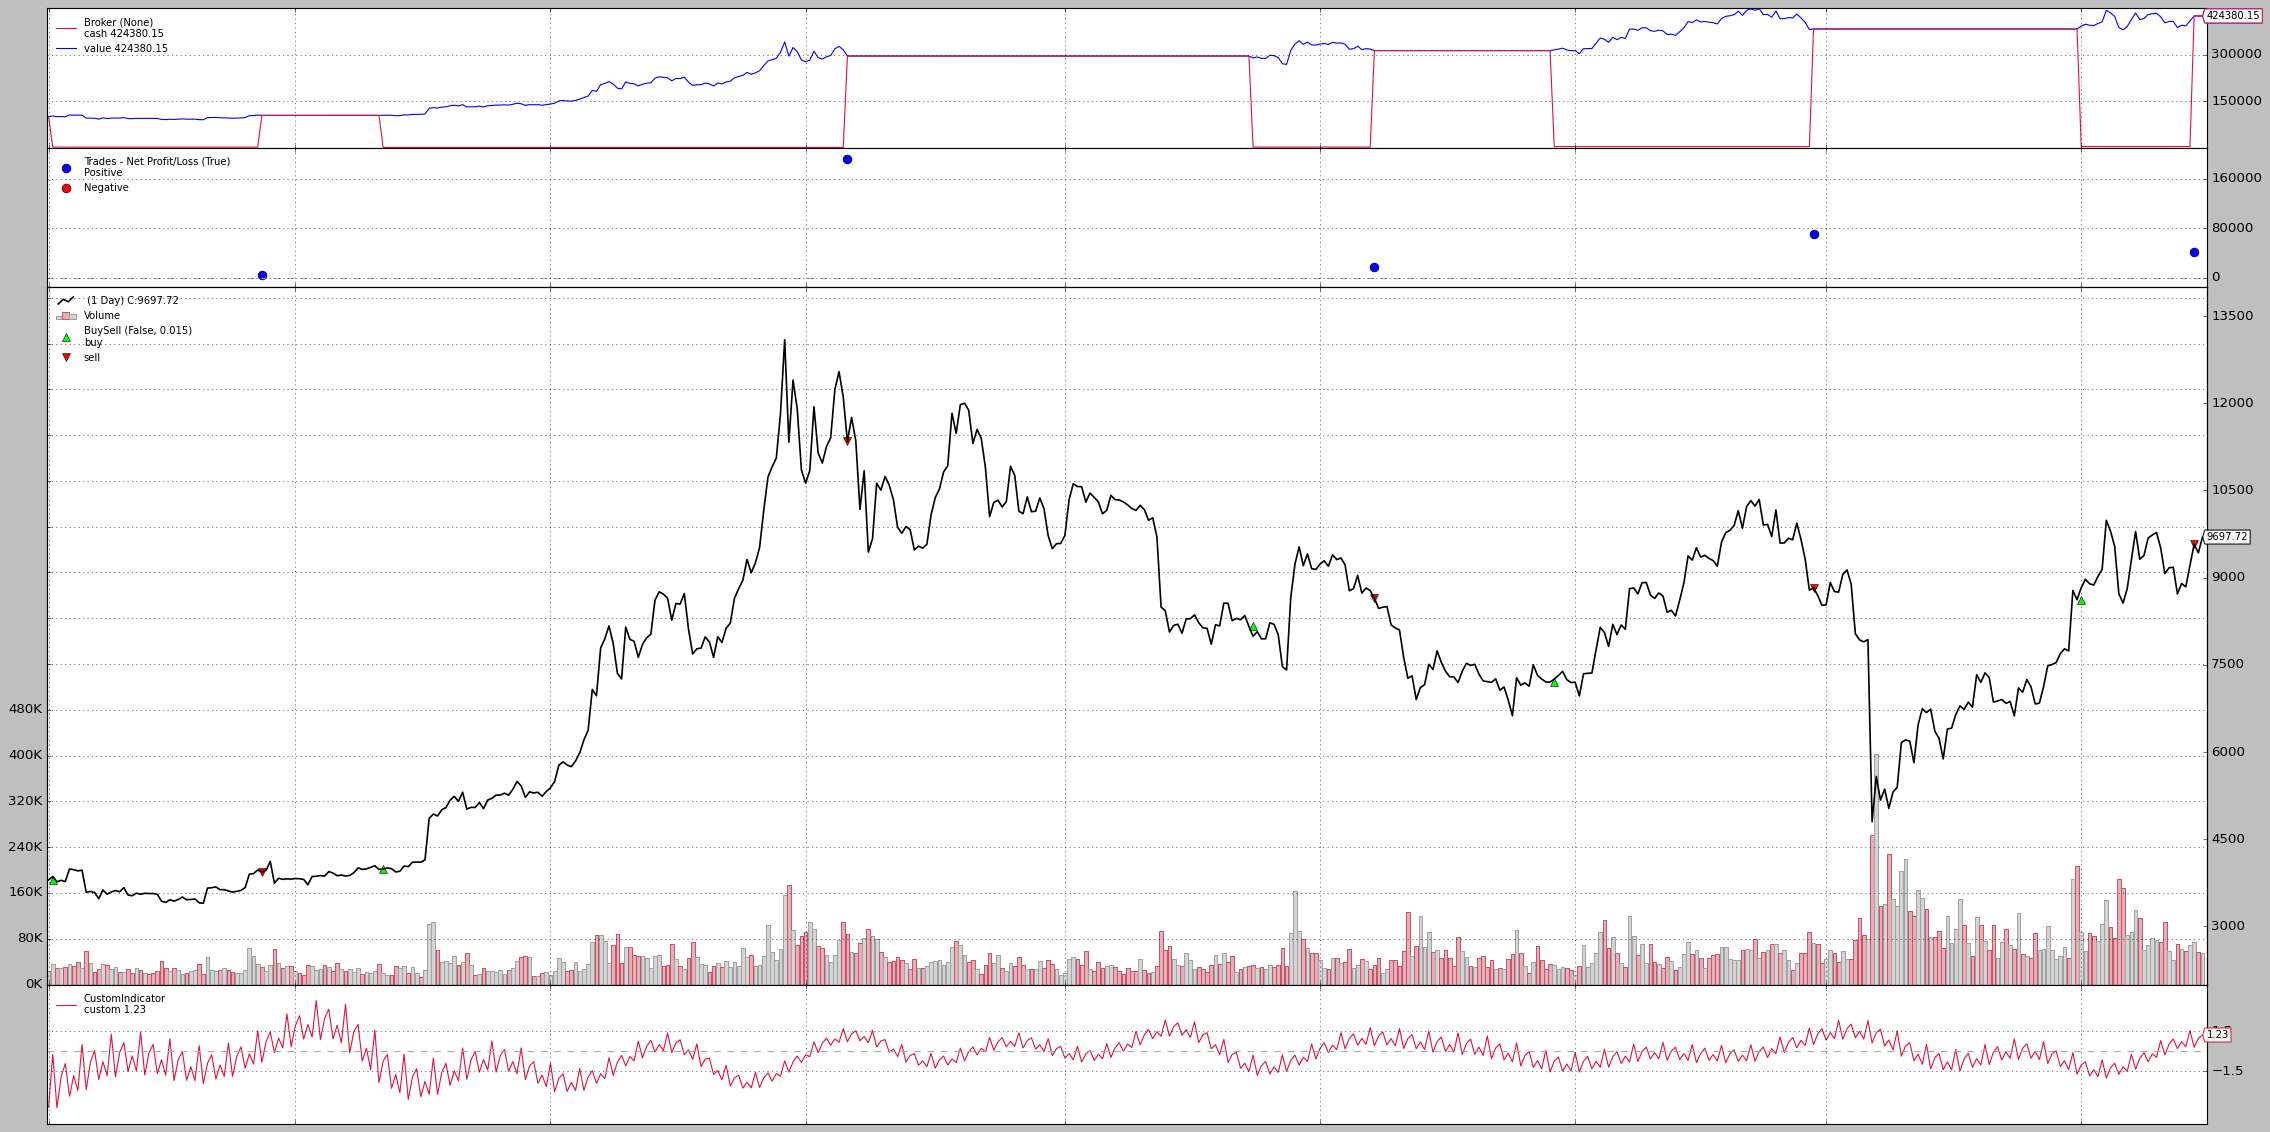

,strat_id,init_cash,buy_prop,sell_prop,fractional,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,upper_limit,lower_limit,custom_column,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0,0,0,0,close,,,False,1.5,0,M,True,1.5,-1.5,custom,1.445459,0.002801,1.025714,102.571365,106,5.215256,23350.29,"{'len': 122, 'drawdown': 21.260773105035412, '...",21.260773,122,1.395392,324380.15,424380.15,5,1.0,5,0,64876.03,64.87603,0.0,0.0,191418.5,191.4185,0.0,0.0


In [ ]:
# Convert predictions to expected 1 day returns
expected_1day_return = pred.set_index("ds").yhat.pct_change().shift(-1).multiply(100)

# Backtest the predictions, given that we buy bitcoin when the predicted next day return is > +1.5%, and sell when it's < -1.5%.
df["custom"] = expected_1day_return.multiply(-1)
backtest("custom", df.dropna(),upper_limit=1.5, lower_limit=-1.5)